# Critical lines, Caustics and Light Curves of N point mass lenses system at the same redshift

## The basic ideas to get the:
 - Caustics: by Inverse Ray Shooting
 - Critical lines: by derive the Jacobian Matrix from the lens equation, then compute the magnification using the determine of the Jacobian Matrix
 - Light Curve: Using the result from Invers Ray Shooting

In [20]:
#import related packages and settings
import sys, time
sys.path.append("../")
from utils import *
from n_pointM_lens_inverse_ray_shoot import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# savebasedir = "../temp/"

In [26]:
# Set mass ratios, positions, angle range, output image size
xylim = 3 # light ray range
Nrows = 5 # number of point masses per raw
posscale = 1 # position of point masses
imgsz = 2048 # image size in pixel
num = 1000 # ray num
kscale = 0.6
method = "slow"# fast(memory comsumming) and slow (save memory)
massrange = [-1,1] # range of randomly generated mass


In [27]:
stupstr = "{}pms_{}X_{}rays".format(Nrows,posscale,num)
xlim, ylim = (-xylim,xylim), (-xylim,xylim)

# # generate lattice of masses
# masses = []
# xs = []
# ys = []
# # generate lattice of point masses
# minx = abs(Nrows//2)
# for i in range(Nrows):
#         masses += [(-1)**(i+k) for k in range(Nrows)]
#         # masses += [(1)**(i+k) for k in range(Nrows)] # all positive
#         xs += [k for k in range(-minx,Nrows-minx)] #
#         ys += [i-minx for k in range(Nrows)]

# masses = np.random.uniform(massrange[0], massrange[1], (Nrows,))
# np.random.seed(5)
masses = np.random.uniform(-1, 1, (Nrows,))
masses = [i*abs(massrange[0]) if i<0 else i*abs(massrange[1]) for i in masses]
xs = np.random.uniform(-1, 1, (Nrows,))
ys = np.random.uniform(-1, 1, (Nrows,))


masses = np.array(masses)
masses = masses/np.sum(masses)
xs = np.array(xs)*posscale
ys = np.array(ys)*posscale
ImgSize = (imgsz,imgsz) # raw, colume
datatype = np.float64

print(" masses: {}\n xs:{}\n ys:{}".format(masses, xs, ys))

 masses: [ 0.64536711 -0.02726983  0.54848823  0.2731983  -0.43978381]
 xs:[-0.76850295  0.93771648 -0.53523269 -0.87640741 -0.70159294]
 ys:[ 0.87661877  0.53393949 -0.04884719 -0.4662991   0.34149406]


In [28]:
# generate light rays in the image plane and creat the two lens system and run the inverse ray shooting code
twolens = Nlenses(masses, xs, ys)
if method == "fast":
    thetax, thetay = genxy(xlim=xlim,ylim=ylim,num=num, datatype = datatype)
    twolens.inverse_ray_shooting(thetax, thetay)
    twolens.comp_mag_samez(thetax, thetay)
    t0 = time.time()
    srcplaneIMG, imgplaneIMG = twolens.img_mapping_inone(thetax, thetay,twolens.betax, twolens.betay, xlim, ylim, ImgSize,valarr1 = twolens.mag, valarr2 = np.ones([len(thetax),]), datatype=datatype)
    t1 = time.time()
elif method == "slow":
    t0 = time.time()
    # srcplaneIMG, imgplaneIMG = twolens.get_imgs_lessmem(ImgSize, xlim, ylim, num, datatype = np.float64)
    srcplaneIMG, imgplaneIMG = twolens.get_imgs_lessmem_v2(ImgSize, xlim, ylim, num, datatype = np.float64)
    t1 = time.time()
# # mid fast method   
else:
    thetax, thetay = genxy(xlim=xlim,ylim=ylim,num=num, datatype = datatype)
    twolens.inverse_ray_shooting(thetax, thetay)
    twolens.comp_mag_samez(thetax, thetay)
    t0 = time.time()
    srcplaneIMG = twolens.img_mapping(twolens.betax, twolens.betay, xlim, ylim, ImgSize, valarr = twolens.mag) #valarr = np.ones([len(twolens.betax),])
    srcplaneIMG_withoutlens = twolens.img_mapping(thetax, thetay, xlim, ylim, ImgSize, valarr = np.ones([len(thetax),]))
    srcplaneIMG /= srcplaneIMG_withoutlens
    imgplaneIMG = twolens.img_mapping(thetax, thetay, xlim, ylim, ImgSize, valarr = twolens.mag)
    t1 = time.time()
print("time spent on inverse ray shooting: {}".format(t1-t0))

100%|██████████| 1000/1000 [00:04<00:00, 235.88it/s]

time spent on inverse ray shooting: 4.277170896530151


In [29]:
# generate light curve
# radius, npoints = 5, 40 # radius in pixel
sourcesizeR_E = 0.03 # source size 0.03 R_E
radius = int(sourcesizeR_E*ImgSize[1]/(xlim[1]-xlim[0]) + 0.5)
# print(radius)# 12
# radius = 15# radius in pixel
k = 0.5
# kscale = 0.6 # source position for generate light curve
B = np.linspace( 1, -1 , 5)*kscale
KB = [(k,b) for b in B]
cname = ["r","g","y","k","c","m","w"]
COLLOR = cname[:len(KB)]
Y, LC = {}, {}
scale = 0.7
# x = np.linspace(xlim[0]*scale, xlim[1]*scale, int(ImgSize[1]*scale/2))#, endpoint=False
x = np.linspace(xlim[0]*scale, xlim[1]*scale, int(ImgSize[1]*scale/radius*3))#, endpoint=False
for kb in KB:
    k,b = kb[0], kb[1]
    Y[kb] = k*x + b
#     LC[kb] = twolens.com_lightcurve(srcplaneIMG, x, Y[kb], xlim, ylim, radius, npoints)
    LC[kb] = twolens.com_lightcurve_v2(srcplaneIMG, x, Y[kb], xlim, ylim, radius)

Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve
Generating lightcurve


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


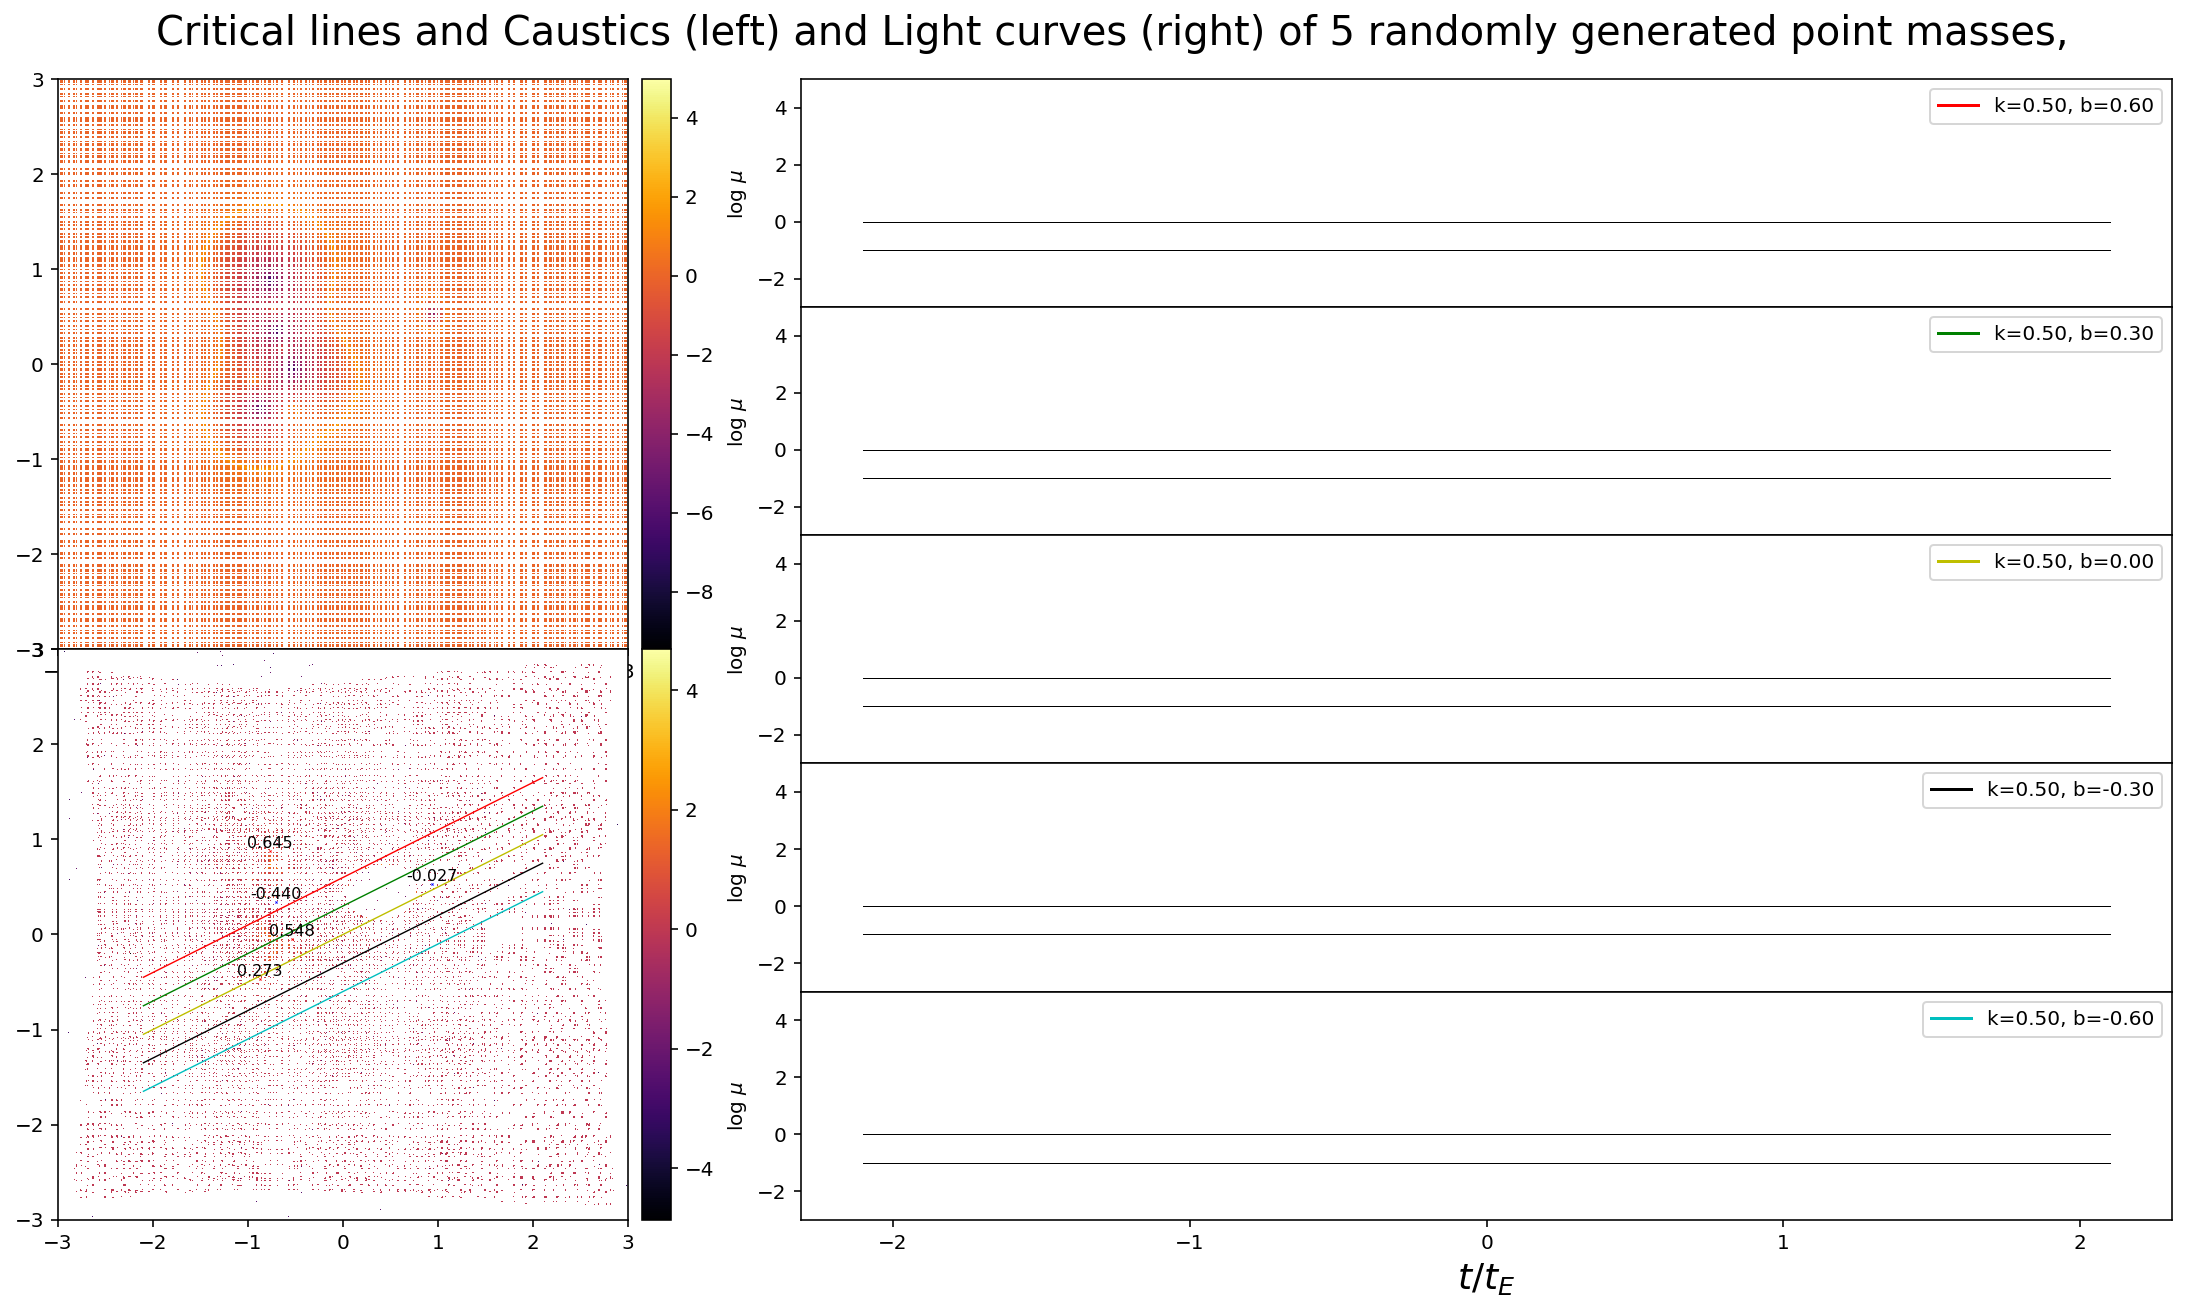

In [30]:
# # plot critical lines and caustics
timestr=time.ctime().replace(" ","")[3:-4]
fontsize = 18
cmap = plt.cm.get_cmap('inferno')
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : fontsize,
}
fig3 = plt.figure()
fig3.set_size_inches(16,9)
plt.subplots_adjust(left=0.04, top = 0.93, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
plt.margins(0,0)

grid = plt.GridSpec(10, 3, wspace=0.2, hspace=0)#, wspace=0.5, hspace=0.5
plt.subplot(grid[0:5,0])
# plt.subplot(131)

imgplaneim = plt.imshow(np.log10(imgplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
add_colorbar(imgplaneim)
# title = "Critical lines of {} point masses, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
# plt.title(title)
# plt.xlabel(r"$\xi_1(D_d\theta_E)$", font1)
# plt.ylabel(r"$\xi_2(D_d\theta_E)$", font1)
# # plt.tick_params(labelsize=fontsize)

plt.subplot(grid[5:10,0])
# plt.subplot(132)
# cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
srcplaneim = plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
add_colorbar(srcplaneim)
# title = "Caustics of {} point masses(blue/red - smaller/larger than 0),\n, q={:.2f}, X = {:.2f}, (Log scale)".format(len(masses),q,posscale)
for m, a, b in zip(masses , xs, ys):  
    if m < 0:
        c = "b"
    else:
        c = "r"
    plt.scatter(a,b,color=c,marker="x",s=0.1)
for m, a, b in zip(masses , xs, ys):  
        # plt.text(a, b, "({:.2f},{:.2f},{:.2f})".format(a,b,m),ha='center', va='bottom', fontsize=5) 
        plt.text(a, b, "{:.3f}".format(m),ha='center', va='bottom', fontsize=8) 

cnt = 0
for kb in KB:
    plt.plot(x,Y[kb],color=COLLOR[cnt],linewidth=0.7)#-ylim[0]
    cnt += 1
# plt.xlabel(r"$\eta_1(D_s\theta_E)$", font1)
# plt.ylabel(r"$\eta_2(D_s\theta_E)$", font1)
# # plt.tick_params(labelsize=fontsize)


#light curve
axes = [1 for i in range(len(KB))]
cnt = 0

for kb in KB:
#     axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
    axes[cnt] = plt.subplot(grid[cnt*2:cnt*2+2,1:3])
#     plt.tick_params(labelsize=fontsize)
    label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
    
    axes[cnt].plot(x,np.log10(LC[kb]),color=COLLOR[cnt%len(KB)],label=label)
    axes[cnt].plot([x[0],x[-1]],[0,0],c="k",linewidth=0.5)
    axes[cnt].plot([x[0],x[-1]],[-1,-1],c="k",linewidth=0.5)
    axes[cnt].set_ylim([-3, 5])
    axes[cnt].set_ylabel(r"$\log$ $\mu$")#
    
#     axes[cnt].plot(x,(LC[kb]),color=COLLOR[cnt],label=label)
#     axes[cnt].plot([x[0],x[-1]],[1,1],linewidth=0.5)
#     axes[cnt].set_ylim([-1, 10])
#     axes[cnt].set_ylabel(r"$\mu$")#,fontsize = fontsize
    
    
    axes[cnt].legend()#prop=font1
#     axes[cnt].set_xlabel(r"$t/t_E$",fontsize = fontsize)
    
#     if cnt == 0:
# #         pass
# #         title = "Light Curve of {} randomly generated point masses".format(Nrows)
# #         title = r"Light Curve of a source star with radius {:.2f} $R_E$".format(sourcesizeR_E)+"\n"+r"2 point mass ratio: $q =$ {:.2f}, separation: $2X =$ {:.2f}".format(q,2*posscale)
#         plt.title(title,fontsize=fontsize)
    
    cnt += 1
axes[cnt-1].set_xlabel(r"$t/t_E$",fontsize = fontsize)
plt.subplots_adjust(hspace=.0)
title = "Critical lines and Caustics (left) and Light curves (right) of {} randomly generated point masses,\n".format(Nrows)
plt.suptitle(title, size=20)
lightcurve_filename = "../resimgs/foranndy/lightcurve_{}_{}.png".format(timestr, stupstr)

In [77]:
if input("save imgs or not? (y/n)>>>: ")=="y":
#     fig1.savefig(caustics_filename, format='png', bbox_inches='tight', dpi=300, pad_inches = 0)#, transparent=True
#     fig2.savefig(lightcurve_filename, format='png', bbox_inches='tight', dpi=300, pad_inches = 0)#, transparent=True
    fig3.savefig(lightcurve_filename, format='png', bbox_inches='tight', dpi=300, pad_inches = 0)#, transparent=True

save imgs or not? (y/n)>>>: y


In [7]:
# # plot critical lines and caustics
# fig = plt.figure()
# plt.subplot(122)
# cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
# plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
# title = "Caustics of {} point masses, X = {:.2f}, (Log scale)".format(len(masses),posscale)
# plt.title(title)

# plt.subplot(121)
# cmap = plt.cm.get_cmap('viridis')
# plt.imshow(np.log10(imgplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
# title = "Critical lines of {} point masses, X = {:.2f}, (Log scale)".format(len(masses),posscale)
# plt.title(title)

# fig.set_size_inches(16,9)
# plt.subplots_adjust(left=0.04, top = 0.9, bottom = 0.05, right=0.96, hspace = 0.13, wspace = 0.13)
# plt.margins(0,0)
# timestr=time.ctime().replace(" ","")[3:-4]
# caustics_filename = "../resimgs/foranndy/Caustics_{}_{}.png".format(timestr, stupstr)

In [6]:
# # generate light curve
# radius, npoints = 5, 40 # radius in pixel
# k = 0.5
# kscale = 0.6 # source position for generate light curve
# # B = np.linspace( -1, 1 , 5)*kscale
# B = np.linspace( -minx, Nrows-minx , 5)*kscale
# KB = [(k,b) for b in B]
# cname = ["r","g","y","k","c","m","w"]
# COLLOR = cname[:len(KB)]
# Y, LC = {}, {}
# scale = 0.9
# x = np.linspace(xlim[0]*scale, xlim[1]*scale, int(ImgSize[1]*scale/2))#, endpoint=False
# for kb in KB:
#     k,b = kb[0], kb[1]
#     Y[kb] = k*x + b
#     LC[kb] = twolens.com_lightcurve(srcplaneIMG, x, Y[kb], xlim, ylim, radius, npoints)

In [5]:
# fig = plt.figure()
# fig.set_size_inches(16,9)
# plt.subplots_adjust(left=0.04, top = 0.9, bottom = 0.05, right=0.96, hspace = 0.13, wspace = 0.13)
# plt.margins(0,0)
# plt.subplot(121)
# cmap = plt.cm.get_cmap('viridis') # 'Paired', viridis, gist_ncar, 
# plt.imshow(np.log10(srcplaneIMG), origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# plt.colorbar()
# title = "Caustics of {} point masses, X = {:.2f}, (Log scale)".format(len(masses),posscale)
# for m, a, b in zip(masses , xs, ys):  
#     if m < 0:
#         c = "b"
#     else:
#         c = "r"
#     plt.scatter(a,b,color=c,marker="x")
# plt.title(title)

# cnt = 0
# for kb in KB:
#     plt.plot(x,Y[kb],color=COLLOR[cnt])#-ylim[0]
#     cnt += 1
# axes = [1 for i in range(len(KB))]
# cnt = 0

# for kb in KB:
#     axes[cnt] = plt.subplot(len(KB), 2, cnt*2+2) #int("42"+str(cnt*2+2))
#     label = "k={:.2f}, b={:.2f}".format(kb[0],kb[1])
#     axes[cnt].plot(x,np.log10(LC[kb]),color=COLLOR[cnt],label=label)

#     axes[cnt].set_ylim([-4, 5])
#     axes[cnt].legend()
#     if cnt == 0:
#         plt.title("Light Curve (Log scale)")
#     cnt += 1
# plt.subplots_adjust(hspace=.0)
# lightcurve_filename = "../resimgs/foranndy/lightcurve_{}_{}.png".format(timestr, stupstr)